In [5]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.var('x')
x

x

## Programación lineal.

**Enunciado.** CEMEX dispone de dos tipos de camiones $A_1$, y $A_2$ para cubrir un determinado
trayecto. El camión $A_1$, debe hacer el trayecto más veces que el camión $A_2$ pero no puede sobrepasar $62$
viajes. Entre los dos camiones deben hacer más de $30$ viajes, pero menos de $150$. En cada viaje del camión $A_1$ la empresa gana $\$220000$ y $\$150000$ por cada viaje del camión $A_2$. ¿Cuántos viajes debe hacer cada camión para obtener el máximo de ganancias?

*Definición de variables*: Sea $x_1$ la cantidad de viajes del camión $A_1$ y $x_2$ la cantidad de  viajes del camión $A_2$.

 **Punto 1** Problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}



**Solución punto 1.**

La función a maximizar es:
$$\max_{x_1,\cdots,x_2} 220000x_1+150000x_2$$
Las restricciones estan dadas por:
Restricciones de camino:
$$x_1\leq 62$$
$$x_2\leq x_1$$
$$x_1+x_2\geq 31$$
$$x_1+x_2\leq 149$$

In [6]:
c = np.array([-220000,-150000])
a = np.array([[1,0],
             [-1,1],
             [-1,-1],
             [1,1]])
b = np.array([62,0,-31,149])


**Punto 2 .** Resolvemos el problema utilizando la función `linprog`. ¿Cuántos será la ganancia total?, ¿Cuántos viajes debe hacer cada camión?

In [7]:
import scipy.optimize as opt

In [8]:
resultado = opt.linprog(c,a,b)
resultado

     con: array([], dtype=float64)
     fun: -22939999.972588304
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([ 7.41566453e-08, -1.75084836e-10,  9.29999999e+01,  2.50000001e+01])
  status: 0
 success: True
       x: array([61.99999993, 61.99999993])

**Conclusión**
la ganancia total es 22940000.00 y es necesario 62 viajes de $A_1$ y 62 viajes $A_2$

**Punto 3** Definiendo funciones de restricción y de costo

In [9]:
def r1(x1):
    return (62-x1)
def r2(x1):
    return(x1)
def r3(x1):
    return(-31+x1)/-1
def r4(x1):
    return(149-x1)
def fun_costo(x1,x2):
    return(220000*x1+150000*x2)

xnum = np.linspace(-10,270,200)
res1 = r1(xnum)
res2 = r2(xnum)
res3 = r3(xnum)
res4 = r4(xnum)

**Punto 4** Graficando

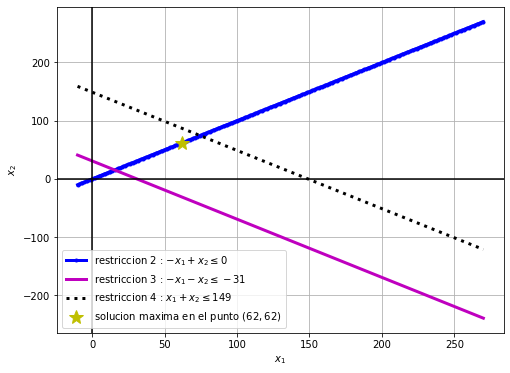

In [12]:
plt.figure(figsize=(8,6))
plt.plot(xnum,res2,'.-b',linewidth=3, label='restriccion 2 : $-x_1+x_2\leq0$')
plt.plot(xnum,res3,'-m',linewidth=3, label='restriccion 3 : $-x_1-x_2\leq-31$')
plt.plot(xnum,res4,':k',linewidth=3, label='restriccion 4 : $x_1+x_2\leq149$')

plt.plot([62],[62],'*y',ms=15,label='solucion maxima en el punto $(62,62)$')

plt.axhline(0,color='k')
plt.axvline(0,color='k')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.grid()
plt.legend(loc='best')
plt.show()